# ---------------- Analysis of Patients with Diabetes----------------

#### NOTE: "The purple text sections throughout this notebook present reports. These reports are carefully constructed summaries and interpretations, derived directly from the statistical scores—like the t-tests and chi-square tests—and the graphical visualizations we've explored."

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

##### Loading the Dataset

In [37]:
data = pd.read_csv("C:/Users/Admin/Downloads/health care diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data[data.isnull()].count() # Checking for Null Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
positive = data[data.Outcome == 1]
positive.head()  # Identifying Positive Outcomes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [10]:
#  Handling Zero Values
def handle_zero_values(df, cols):
    """Replaces zero values with NaN and imputes with median."""
    df[cols] = df[cols].replace(0, np.nan)
    df.fillna(df.median(), inplace=True)
    return df

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data = handle_zero_values(data, cols_to_replace)
print("Zero values handled.")


Zero values handled.


C:\Users\Admin\AppData\Local\Temp\ipykernel_6812\3527567578.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [40]:

positive = data[data.Outcome == 1]
positive.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [41]:
total_positive = data.Outcome.sum()
total_positive

268

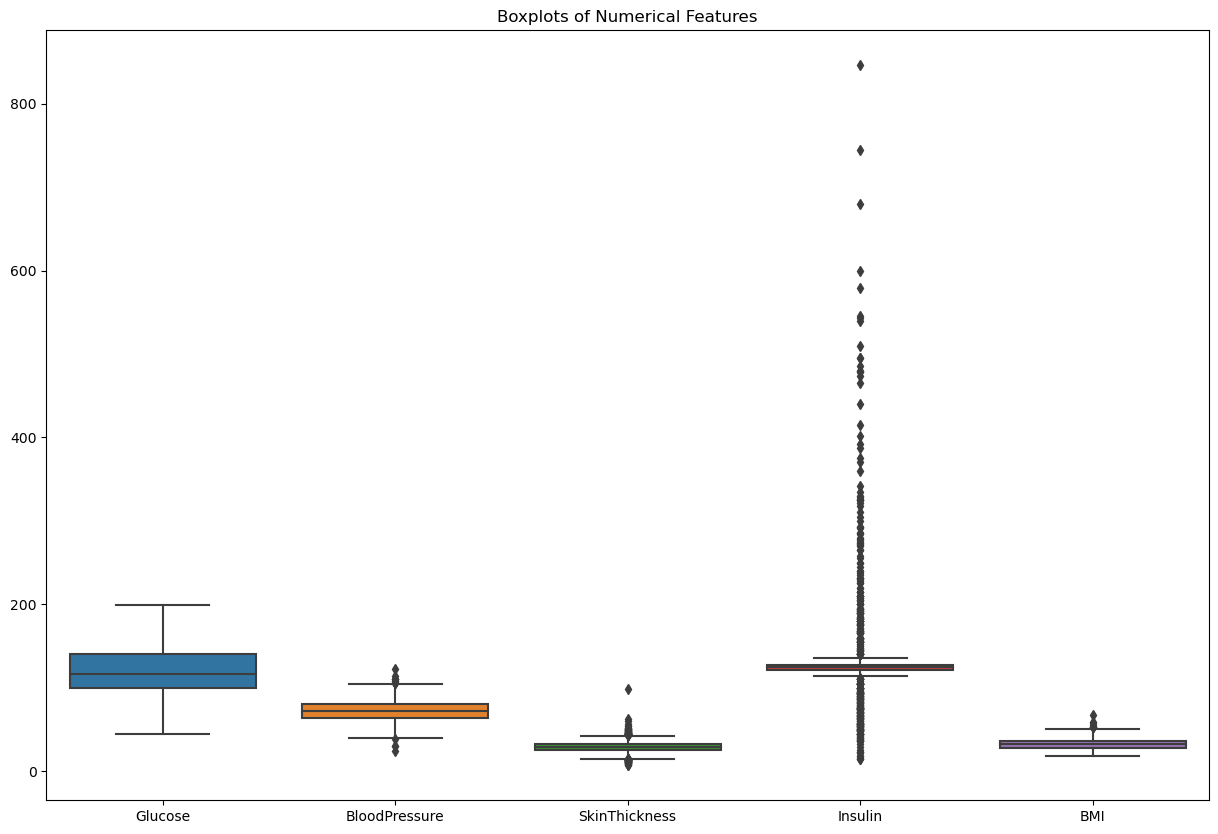

Outliers handled.


In [12]:
#  Outlier Detection and Handling
def detect_and_handle_outliers(df, cols):
    """Detects and handles outliers using box plots and capping."""
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[cols])
    plt.title("Boxplots of Numerical Features")
    plt.show()

    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print("Outliers handled.")
    return df

data = detect_and_handle_outliers(data, cols_to_replace)

### <p style="color:purple;">The boxplot reveals significant outliers, especially in <strong style="color:crimson;">'Insulin'</strong>, indicating extreme values that could skew analysis. Capping mitigates this impact.</p>

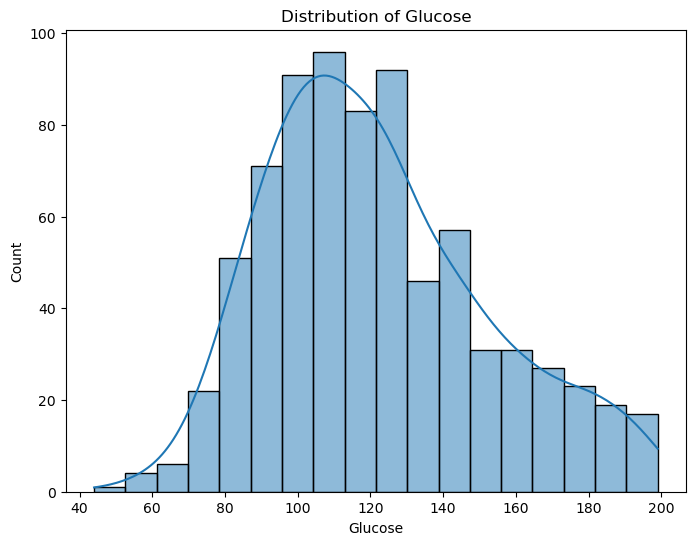

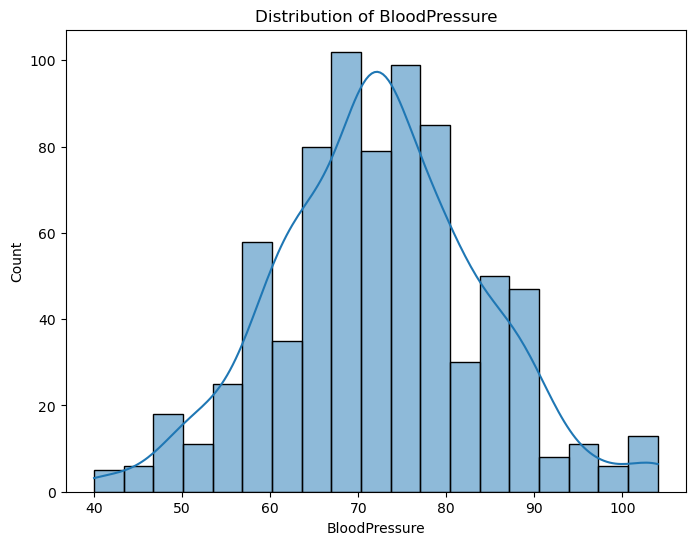

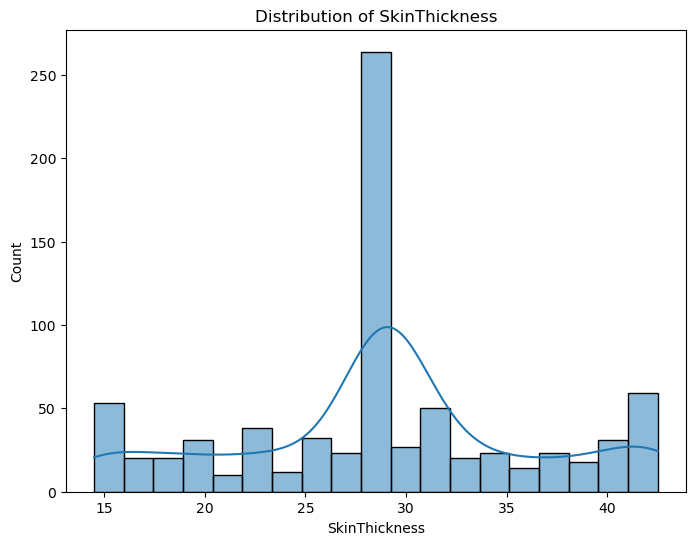

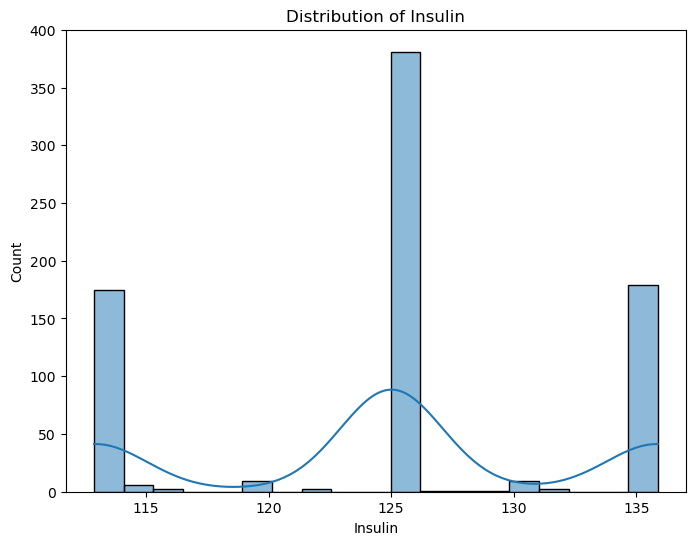

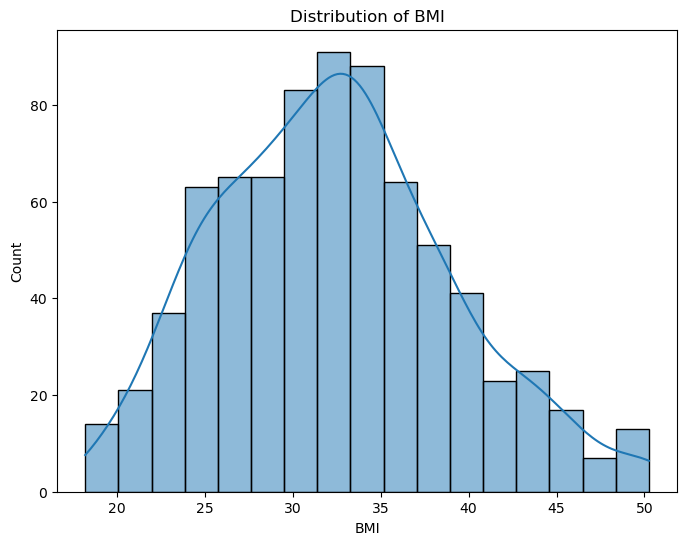

In [17]:
# Feature Distributions
def plot_feature_distributions(df, cols):
    """Plots histograms and density plots for numerical features."""
    for col in cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
        
plot_feature_distributions(data, cols_to_replace)
        

### <div style="color:purple;">Glucose, BloodPressure, and BMI show normal distributions. SkinThickness and Insulin have highly suspect, irregular patterns, indicating data errors.  data correction is needed.
</div>

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

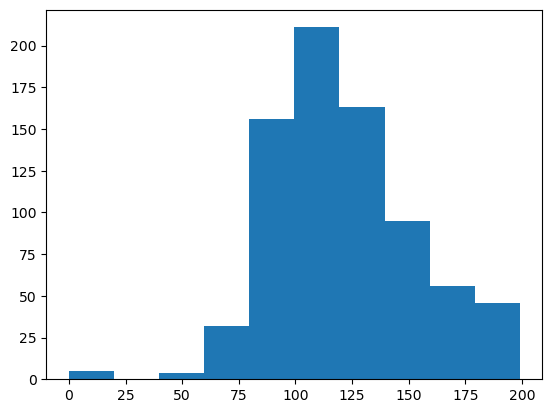

In [7]:
plt.hist(data.Glucose)

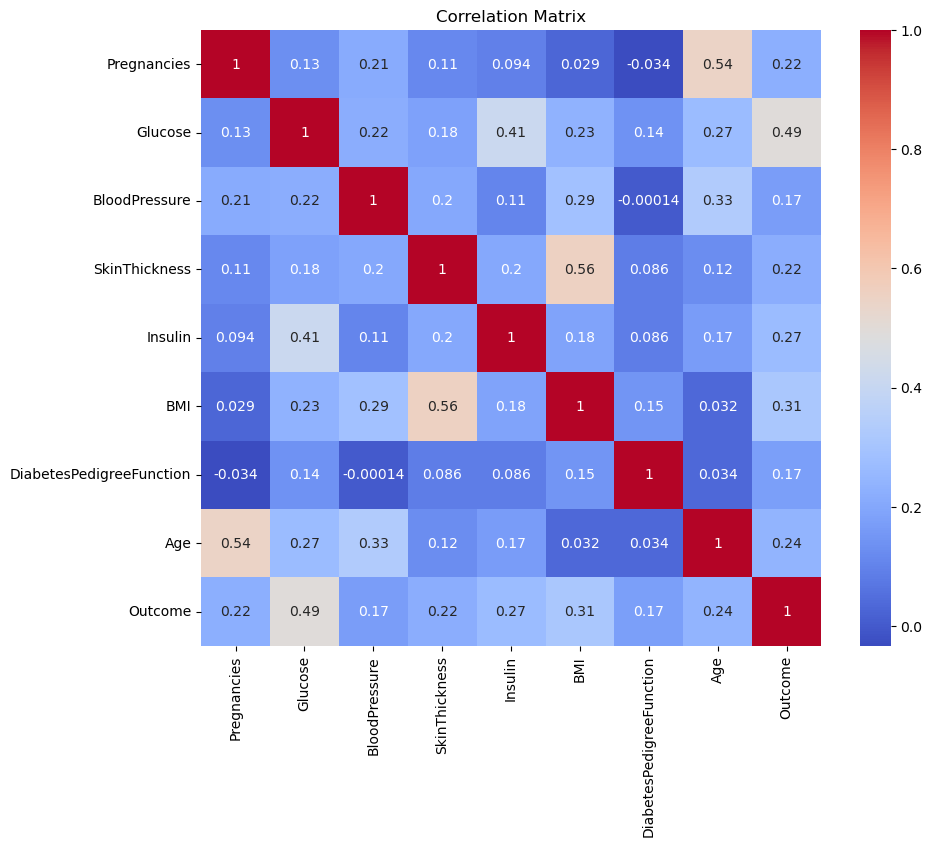

In [18]:
# Correlation Analysis
def plot_correlation_matrix(df):
    """Plots the correlation matrix as a heatmap."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(data)

### <div style="color:purple;"> Glucose and Outcome show moderate correlation; SkinThickness and Insulin data are questionable. Age impacts Pregnancies positively.
</div>

# INDEPTH ANALYSIS 

In [19]:
#  Feature Engineering
def create_derived_features(df):
    """Creates BMI category and age group features."""
    def bmi_category(bmi):
        if bmi < 18.5: return 'Underweight'
        elif 18.5 <= bmi < 25: return 'Normal'
        elif 25 <= bmi < 30: return 'Overweight'
        else: return 'Obese'

    df['BMICategory'] = df['BMI'].apply(bmi_category)
    df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 80], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
    return df

data = create_derived_features(data)
print("Derived features created.")

Derived features created.


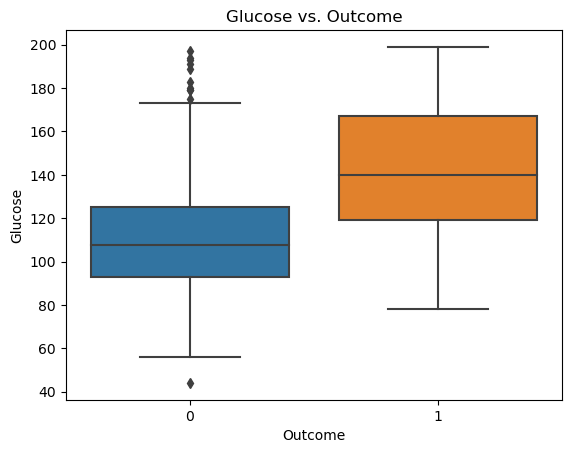

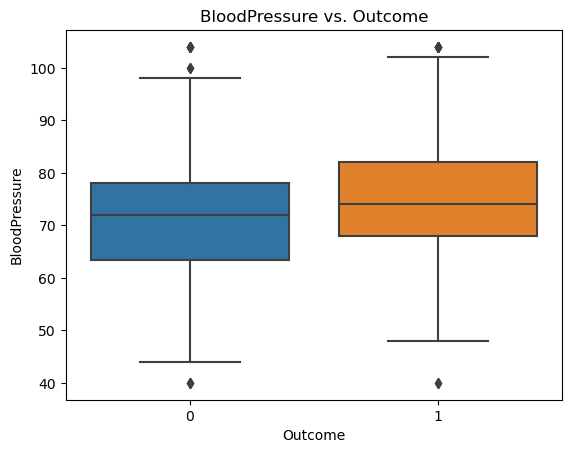

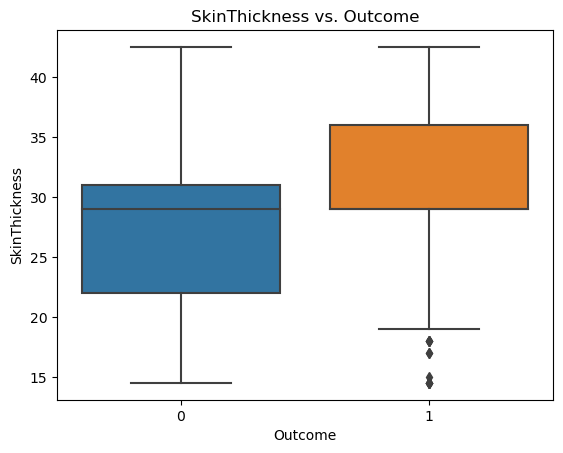

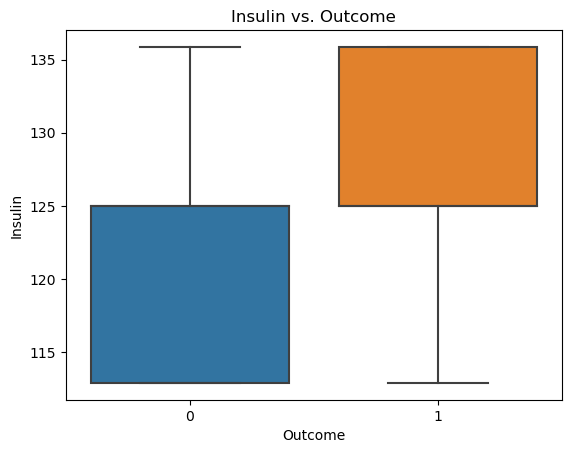

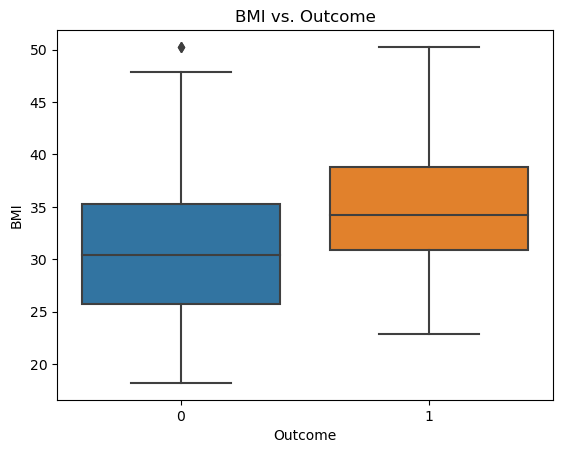

In [20]:
#  Comparative Analysis
def compare_distributions(df, col, target='Outcome'):
    """Compares feature distributions between outcome groups."""
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs. {target}")
    plt.show()

for col in cols_to_replace:
    compare_distributions(data, col)

### <div style="color:purple;">Higher Glucose, BloodPressure, SkinThickness, Insulin, and BMI correlate with positive Outcomes; SkinThickness and Insulin show unusual distributions.
</div>

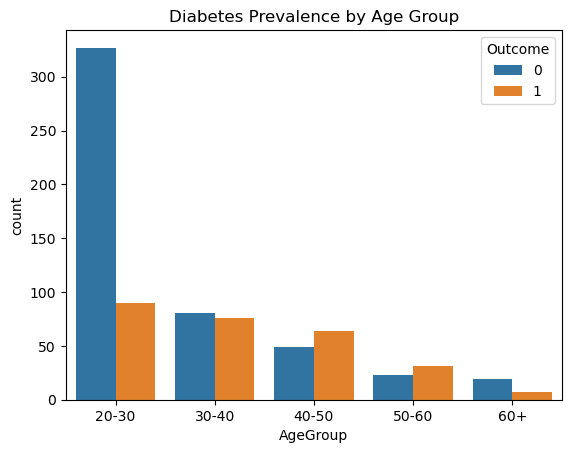

In [21]:
#  Age-Based Analysis
def analyze_age_groups(df):
    """Analyzes diabetes prevalence by age group."""
    sns.countplot(x='AgeGroup', hue='Outcome', data=df)
    plt.title("Diabetes Prevalence by Age Group")
    plt.show()

analyze_age_groups(data)

### <div style="color:purple;">Diabetes prevalence decreases with age. 20-30 age group has highest non-diabetic cases. Older groups show relatively equal diabetic/non-diabetic counts.
</div>

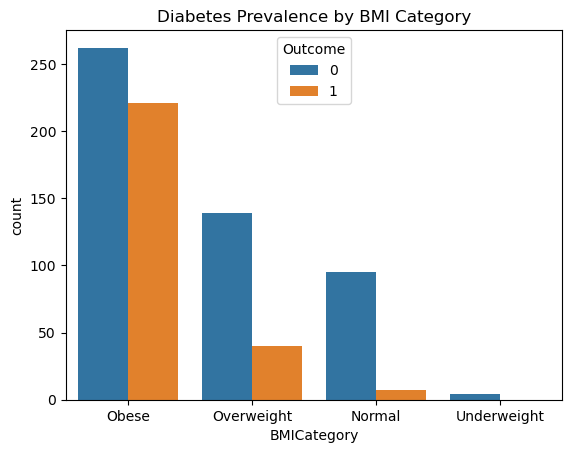

In [22]:
#  BMI Analysis
def analyze_bmi_categories(df):
    """Analyzes diabetes prevalence by BMI category."""
    sns.countplot(x='BMICategory', hue='Outcome', data=df)
    plt.title('Diabetes Prevalence by BMI Category')
    plt.show()

analyze_bmi_categories(data)

### <div style="color:purple;">Diabetes prevalence increases with higher BMI categories. Obese group has highest diabetic cases. Underweight group has lowest prevalence.
</div>

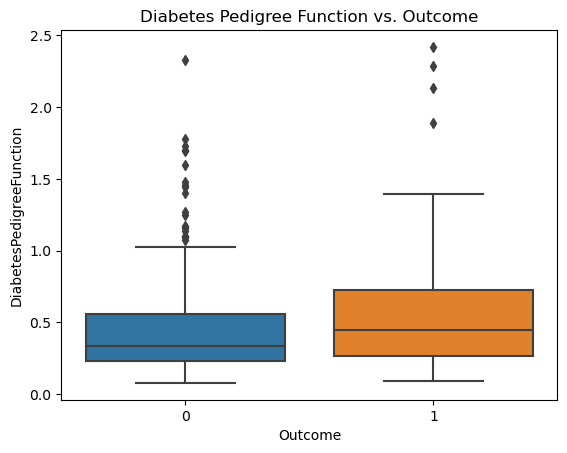

In [23]:
#  Diabetes Pedigree Function Analysis
def analyze_pedigree_function(df):
    """Analyzes the impact of DiabetesPedigreeFunction on outcome."""
    sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
    plt.title("Diabetes Pedigree Function vs. Outcome")
    plt.show()

analyze_pedigree_function(data)

### <div style="color:purple;">Diabetes Pedigree Function shows higher median values for positive outcomes, with more outliers indicating potential genetic predisposition to diabetes.
</div>

#  3. Enhanced Visualizations 

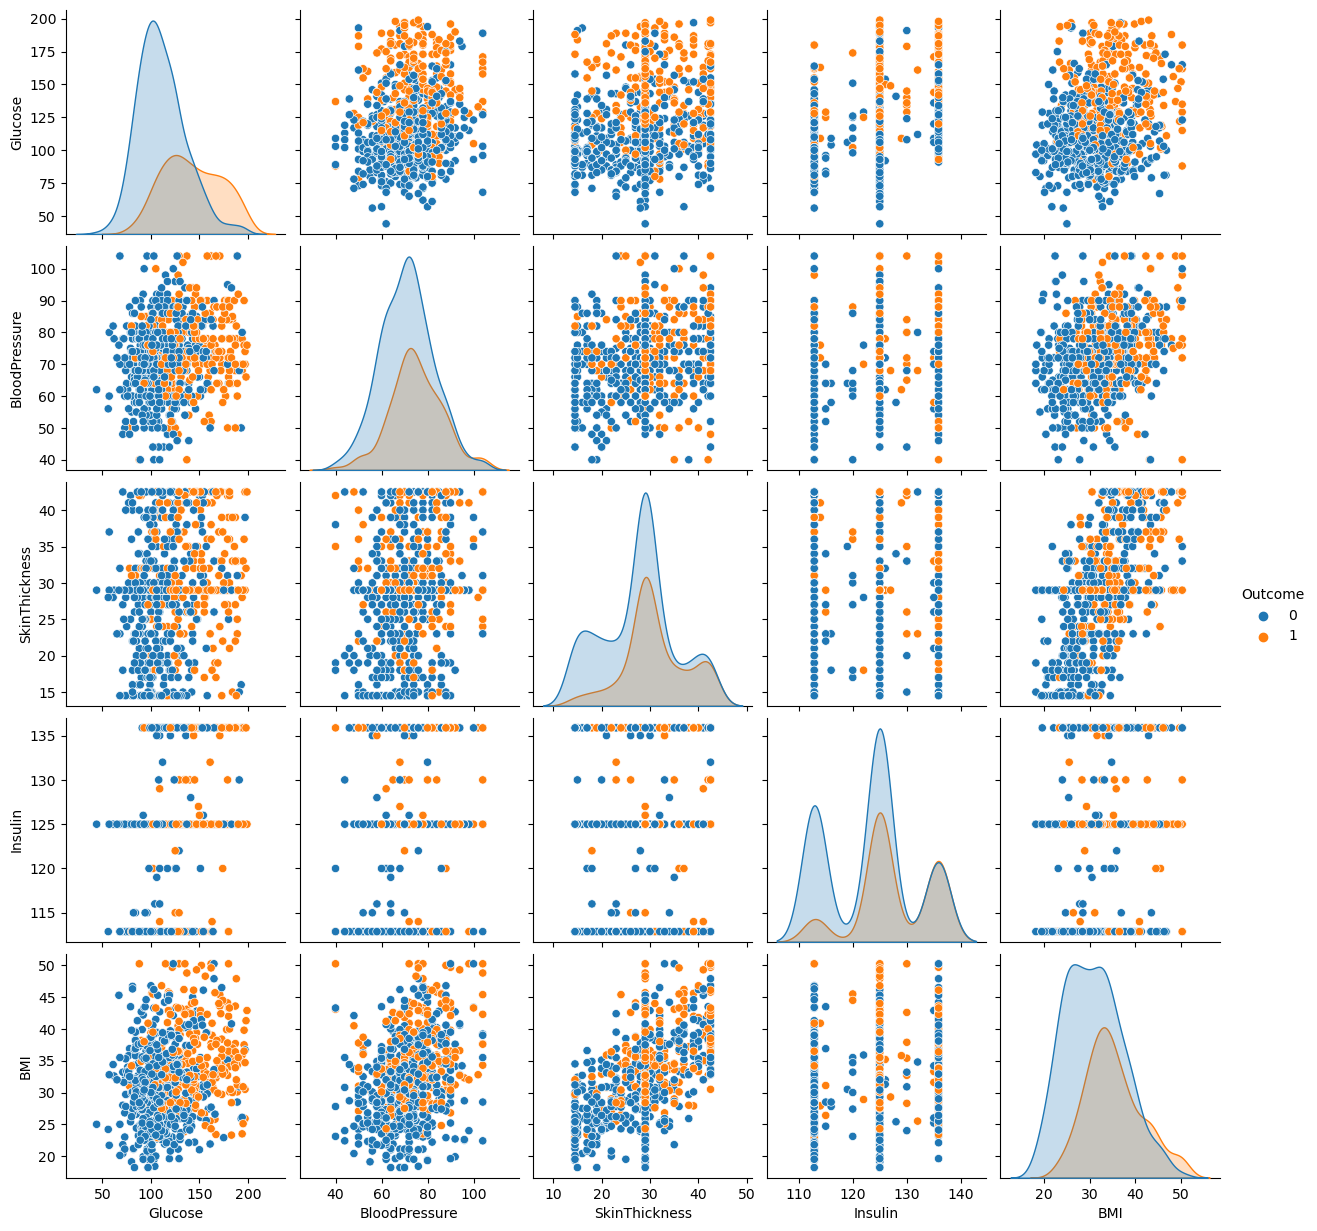

In [24]:
#  Seaborn Pair Plots
def plot_pair_plots(df, cols):
    """Plots pairwise relationships between numerical features."""
    sns.pairplot(df[cols + ['Outcome']], hue='Outcome')
    plt.show()

plot_pair_plots(data, cols_to_replace)


### <div style="color:purple;">Pair plots show Glucose and BMI correlate with Outcome. SkinThickness and Insulin display unusual patterns. BloodPressure has less clear distinction.
</div>

#  4. Statistical Analysis 

In [26]:
# Statistical Tests
from scipy.stats import ttest_ind, chi2_contingency
def perform_statistical_tests(df, col, target='Outcome'):
    """Performs t-tests and chi-square tests."""
    if df[col].dtype in ['int64', 'float64']:
        group1 = df[df[target] == 0][col]
        group2 = df[df[target] == 1][col]
        t_stat, p_val = ttest_ind(group1, group2)
        print(f"T-test for {col}: t-statistic = {t_stat}, p-value = {p_val}")
    else:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p_val, _, _ = chi2_contingency(contingency_table)
        print(f"Chi-square test for {col}: chi2 = {chi2}, p-value = {p_val}")

for col in data.columns:
    perform_statistical_tests(data, col)

T-test for Pregnancies: t-statistic = -6.298430550035151, p-value = 5.065127298053476e-10
T-test for Glucose: t-statistic = -15.673795182294105, p-value = 3.1287190418423694e-48
T-test for BloodPressure: t-statistic = -4.744790951309412, p-value = 2.49009570159764e-06
T-test for SkinThickness: t-statistic = -6.245106120314744, p-value = 7.015939101694924e-10
T-test for Insulin: t-statistic = -7.648939057659799, p-value = 6.086930912570725e-14
T-test for BMI: t-statistic = -9.11501907483364, p-value = 6.77542055430045e-19
T-test for DiabetesPedigreeFunction: t-statistic = -4.88582646072744, p-value = 1.254607010148809e-06
T-test for Age: t-statistic = -6.792688071649956, p-value = 2.2099754606654358e-11
T-test for Outcome: t-statistic = -inf, p-value = 0.0
Chi-square test for AgeGroup: chi2 = 81.38266741305324, p-value = 8.872052404811894e-17
Chi-square test for BMICategory: chi2 = 74.9084804674606, p-value = 3.790718167139003e-16


C:\Users\Admin\AppData\Local\Temp\ipykernel_6812\803372235.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(group1, group2)


### <div style="color:purple;">Significant p-values (<<0.05) across t-tests and chi-squares confirm strong associations between features and diabetes outcomes.
</div>

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



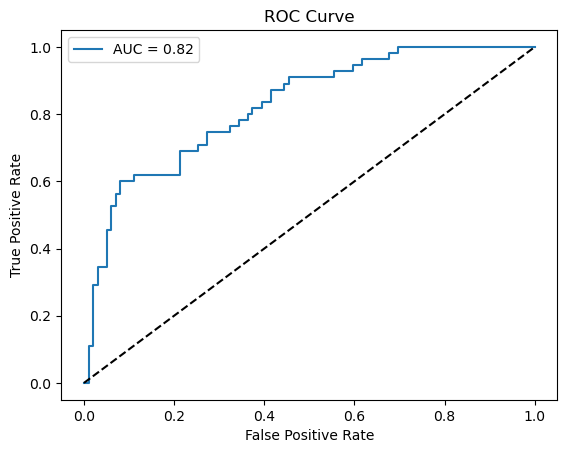

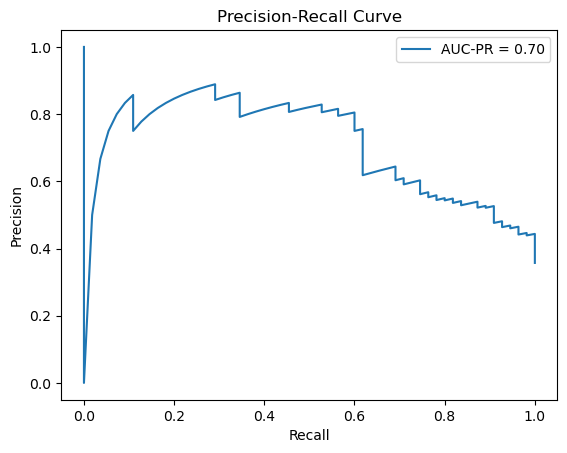

In [31]:
# Logistic Regression (Basic Modeling)
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
def build_logistic_regression_model(df):
    """Builds and evaluates a logistic regression model."""
    X = df.drop(['Outcome', 'AgeGroup', 'BMICategory'], axis=1)
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))

    # 4.3 Model Evaluation
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob) # Now roc_auc_score will work
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auc_pr = auc(recall, precision)
    plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

build_logistic_regression_model(data)

#  REPORT

        

Class 0 (No Diabetes):
* Precision: 0.79 (Out of all predicted "no diabetes," 79% were actually correct).
* Recall: 0.80 (Out of all actual "no diabetes" cases, 80% were correctly identified).
* F1-score: 0.79 (Harmonic mean of precision and recall).


Class 1 (Diabetes):
* Precision: 0.63 (Out of all predicted "diabetes," 63% were actually correct).
* Recall: 0.62 (Out of all actual "diabetes" cases, 62% were correctly identified).
* F1-score: 0.62.



Accuracy: 0.73 (Overall percentage of correctly classified instances).

In [46]:
# Testing the predictions 

print("Enter patient data:")
pregnancies = int(input("Pregnancies: "))
glucose = int(input("Glucose: "))
blood_pressure = int(input("BloodPressure: "))
skin_thickness = int(input("SkinThickness: "))
insulin = int(input("Insulin: "))
bmi = float(input("BMI: "))
diabetes_pedigree_function = float(input("DiabetesPedigreeFunction: "))
age = int(input("Age: "))

# Create a DataFrame from user input
user_patient = pd.DataFrame({
    'Pregnancies': [pregnancies],
    'Glucose': [glucose],
    'BloodPressure': [blood_pressure],
    'SkinThickness': [skin_thickness],
    'Insulin': [insulin],
    'BMI': [bmi],
    'DiabetesPedigreeFunction': [diabetes_pedigree_function],
    'Age': [age]
})

# Predict the probability of diabetes
probability = model.predict_proba(user_patient)[:, 1]

# Make the final prediction (0 or 1)
prediction = model.predict(user_patient)[0]

# Output the results
print(f"\nUser Patient Data:\n{user_patient}")
print(f"\nProbability of Diabetes: {probability[0]:.4f}")
print(f"Final Prediction: {prediction} (1 = Diabetes, 0 = No Diabetes)")

Enter patient data:
Pregnancies: 3
Glucose: 150
BloodPressure: 80
SkinThickness: 90
Insulin: 100
BMI: 30
DiabetesPedigreeFunction: 10
Age: 45

User Patient Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      150             80             90      100  30.0   

   DiabetesPedigreeFunction  Age  
0                      10.0   45  

Probability of Diabetes: 0.9976
Final Prediction: 1 (1 = Diabetes, 0 = No Diabetes)
